In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("diabetes.csv")

# Display first few rows
print("✅ Dataset Loaded Successfully!\n")
print(data.head())


✅ Dataset Loaded Successfully!

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


✅ Dataset Loaded Successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null

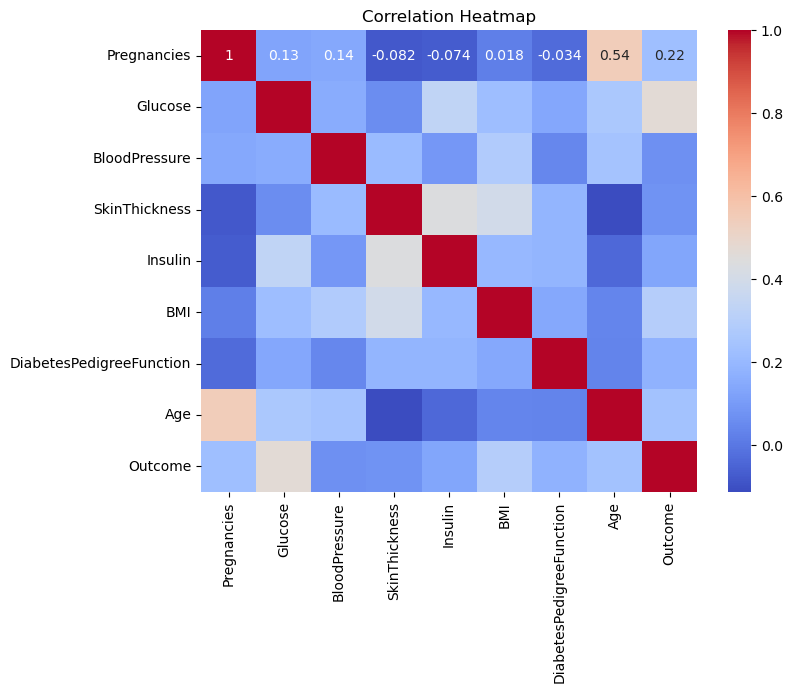


📊 Logistic Regression Results:
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


🌲 Random Forest Results:
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



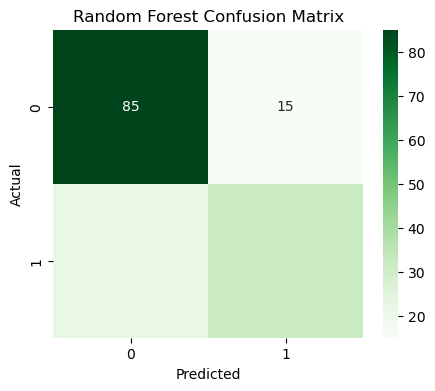

In [ ]:
# ===============================
# Diabetes Prediction Project
# ===============================

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = pd.read_csv("diabetes.csv")
print("✅ Dataset Loaded Successfully!")
print(data.head())

# Step 2: Basic Info
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Step 3: Basic Statistics
print("\nSummary Statistics:")
print(data.describe())

# Step 4: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Features and Target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Normalize (scale) features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Model training - Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Step 9: Model training - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 10: Evaluation
print("\n📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 11: Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [3]:
# 1️⃣ Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 2️⃣ Load dataset
data = pd.read_csv("diabetes.csv")
print(data.head())  # check first few rows

# 3️⃣ Split features and target
X = data.drop("Outcome", axis=1)  # all columns except Outcome
y = data["Outcome"]               # target column

# 4️⃣ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Feature scaling (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 7️⃣ Function to predict diabetes from user input
def predict_diabetes(user_input):
    """
    user_input: list of values [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    """
    input_scaled = scaler.transform([user_input])  # scale input
    prediction = model.predict(input_scaled)
    return "Has diabetes" if prediction[0] == 1 else "No diabetes"

# 8️⃣ Ask user for input
print("Enter the following details:")
pregnancies = float(input("Number of pregnancies: "))
glucose = float(input("Glucose level: "))
bp = float(input("Blood pressure: "))
skin = float(input("Skin thickness: "))
insulin = float(input("Insulin level: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

user_data = [pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]

# 9️⃣ Make prediction
result = predict_diabetes(user_data)
print(f"Prediction: {result}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Enter the following details:


Number of pregnancies:  2
Glucose level:  120
Blood pressure:  70
Skin thickness:  25
Insulin level:  80
BMI:  28.5
Diabetes Pedigree Function:  0.5
Age:  33


Prediction: No diabetes


C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
# 1️⃣ Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 2️⃣ Load dataset
data = pd.read_csv("diabetes.csv")
print(data.head())  # check first few rows

# 3️⃣ Split features and target
X = data.drop("Outcome", axis=1)  # all columns except Outcome
y = data["Outcome"]               # target column

# 4️⃣ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 7️⃣ Function to predict diabetes from user input (fixed)
def predict_diabetes(user_input):
    """
    user_input: list of values [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    """
    # Convert to DataFrame with same columns as X
    input_df = pd.DataFrame([user_input], columns=X.columns)
    
    # Scale input
    input_scaled = scaler.transform(input_df)
    
    # Predict
    prediction = model.predict(input_scaled)
    return "Has diabetes" if prediction[0] == 1 else "No diabetes"

# 8️⃣ Ask user for input
print("Enter the following details:")
pregnancies = float(input("Number of pregnancies: "))
glucose = float(input("Glucose level: "))
bp = float(input("Blood pressure: "))
skin = float(input("Skin thickness: "))
insulin = float(input("Insulin level: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

user_data = [pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]

# 9️⃣ Make prediction
result = predict_diabetes(user_data)
print(f"Prediction: {result}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Enter the following details:


Number of pregnancies:  2
Glucose level:  12070
Blood pressure:  80
Skin thickness:  35
Insulin level:  0
BMI:  33.8
Diabetes Pedigree Function:  0.9
Age:  55


Prediction: Has diabetes
